In [1]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
import os
from sklearn.model_selection import train_test_split
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
import itertools

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#df = pd.read_csv(r"../input/coughclassifier-trial/Smote_data.csv")
df = pd.read_csv(r"../input/cough-test-files/with_coswara_csv_smote.csv")

In [3]:
# 1 - Healthy
# 0 - COVID +ve

In [4]:
# Explainable Models:
#
# - RandomForestClassifier
# - DecisionTreeClassifier
# - XGBClassifier
# - ExplainableBoostingClassifier --> Explanation pending
# - Logistic Regression (With Explanation from interpret_ml)

In [5]:
# With MinMaxScaler implemented
df

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0        0.516903  0.296131           0.287951            0.464378  0.323129   
1        0.597166  0.116701           0.442590            0.657152  0.508201   
2        0.341343  0.131307           0.279544            0.337267  0.310882   
3        0.580521  0.145074           0.796867            0.850497  0.829676   
4        0.519560  0.146982           0.301465            0.475444  0.322917   
...           ...       ...                ...                 ...       ...   
2675     0.608064  0.141334           0.320134            0.449940  0.350779   
2676     0.589962  0.160847           0.461109            0.644168  0.534669   
2677     0.594323  0.108670           0.624202            0.674508  0.652684   
2678     0.647319  0.122002           0.457926            0.609220  0.545721   
2679     0.575585  0.160396           0.469745            0.701185  0.567761   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
0               0.268197  0.702345  0.443317  0.686826  0.209907  ...   
1               0.300657  0.701929  0.347362  0.633048  0.217648  ...   
2               0.194871  0.620552  0.210373  0.677441  0.297886  ...   
3               0.628822  0.682769  0.134682  0.714739  0.210579  ...   
4               0.264108  0.671653  0.431219  0.506082  0.228865  ...   
...                  ...       ...       ...       ...       ...  ...   
2675            0.291652  0.672167  0.505759  0.490006  0.442110  ...   
2676            0.320286  0.731267  0.387737  0.541343  0.147231  ...   
2677            0.632794  0.626599  0.261822  0.545529  0.297378  ...   
2678            0.342310  0.649296  0.404510  0.505648  0.234695  ...   
2679            0.345983  0.688266  0.293176  0.710376  0.258195  ...   

        mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0     0.479708  0.663643  0.456889  0.424314  0.796013  0.386405  0.446575   
1     0.536530  0.431851  0.655836  0.400682  0.504031  0.421020  0.433428   
2     0.500845  0.537336  0.514819  0.559783  0.514758  0.543263  0.530230   
3     0.423355  0.471005  0.636925  0.576468  0.552425  0.551981  0.581638   
4     0.396103  0.514609  0.549546  0.675858  0.658785  0.448534  0.594166   
...        ...       ...       ...       ...       ...       ...       ...   
2675  0.429295  0.523830  0.421744  0.538306  0.542464  0.101315  0.382437   
2676  0.587698  0.445837  0.689435  0.497311  0.611039  0.374199  0.479896   
2677  0.426719  0.564047  0.432202  0.696670  0.459278  0.407902  0.515581   
2678  0.483699  0.508462  0.551785  0.615279  0.342816  0.508978  0.511391   
2679  0.324775  0.400983  0.676430  0.469935  0.644388  0.517059  0.492952   

        mfcc19    mfcc20  label  
0     0.408797  0.193187      0  
1     0.197222  0.287836      0  
2     0.395976  0.350435      0  
3     0.492077  0.479997      0  
4     0.531466  0.303923      0  
...        ...       ...    ...  
2675  0.228533  0.137794      1  
2676  0.527775  0.204223      1  
2677  0.398248  0.319955      1  
2678  0.435304  0.287830      1  
2679  0.486119  0.270636      1  

[2680 rows x 27 columns]

In [6]:
df.describe()

chroma_stft         rmse  spectral_centroid  spectral_bandwidth  \
count  2680.000000  2680.000000        2680.000000         2680.000000   
mean      0.574053     0.139271           0.417957            0.550671   
std       0.114354     0.084630           0.124909            0.143132   
min       0.000000     0.000000           0.000000            0.000000   
25%       0.512279     0.080900           0.323555            0.459873   
50%       0.583753     0.128845           0.417852            0.562603   
75%       0.647706     0.183794           0.492007            0.643714   
max       1.000000     1.000000           1.000000            1.000000   

           rolloff  zero_crossing_rate        mfcc1        mfcc2        mfcc3  \
count  2680.000000         2680.000000  2680.000000  2680.000000  2680.000000   
mean      0.462870            0.370388     0.657037     0.381530     0.533831   
std       0.139334            0.165748     0.083142     0.138704     0.126072   
min       0.000000            0.000000     0.000000     0.000000     0.000000   
25%       0.359015            0.247161     0.614744     0.281028     0.467600   
50%       0.468628            0.334436     0.662164     0.357386     0.546434   
75%       0.555907            0.474167     0.707467     0.466986     0.620367   
max       1.000000            1.000000     1.000000     1.000000     1.000000   

             mfcc4  ...       mfcc12       mfcc13       mfcc14       mfcc15  \
count  2680.000000  ...  2680.000000  2680.000000  2680.000000  2680.000000   
mean      0.281842  ...     0.454912     0.476106     0.523211     0.568891   
std       0.084626  ...     0.109088     0.127001     0.122279     0.109873   
min       0.000000  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.229199  ...     0.389695     0.409430     0.443327     0.497548   
50%       0.281118  ...     0.453773     0.481757     0.526703     0.572791   
75%       0.332307  ...     0.520846     0.558684     0.604071     0.639678   
max       1.000000  ...     1.000000     1.000000     1.000000     1.000000   

            mfcc16       mfcc17       mfcc18       mfcc19       mfcc20  \
count  2680.000000  2680.000000  2680.000000  2680.000000  2680.000000   
mean      0.511596     0.451785     0.494477     0.389455     0.311779   
std       0.110862     0.099315     0.097734     0.105908     0.081099   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.440970     0.395900     0.440652     0.328475     0.263968   
50%       0.512935     0.455873     0.499633     0.398908     0.314996   
75%       0.578106     0.516059     0.551101     0.454781     0.361350   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             label  
count  2680.000000  
mean      0.500000  
std       0.500093  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000  

[8 rows x 27 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         2680 non-null   float64
 1   rmse                2680 non-null   float64
 2   spectral_centroid   2680 non-null   float64
 3   spectral_bandwidth  2680 non-null   float64
 4   rolloff             2680 non-null   float64
 5   zero_crossing_rate  2680 non-null   float64
 6   mfcc1               2680 non-null   float64
 7   mfcc2               2680 non-null   float64
 8   mfcc3               2680 non-null   float64
 9   mfcc4               2680 non-null   float64
 10  mfcc5               2680 non-null   float64
 11  mfcc6               2680 non-null   float64
 12  mfcc7               2680 non-null   float64
 13  mfcc8               2680 non-null   float64
 14  mfcc9               2680 non-null   float64
 15  mfcc10              2680 non-null   float64
 16  mfcc11

In [8]:
X = df.iloc[: ,:-1]
Y = df.iloc[: ,-1]

In [9]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
features = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']

In [11]:
# https://github.com/Trusted-AI/AIX360 - Issues
# https://github.com/BCG-Gamma/facet - Issues
# https://github.com/oegedijk/explainerdashboard - Working
# https://github.com/explainX/explainx - Installation Issue
# LIME and SHAP Implementations
# https://github.com/EthicalML/xai - Not much useful
# https://github.com/interpretml/interpret - Ongoing -- Working
# https://github.com/MarcelRobeer/ContrastiveExplanation - Ongoing
# https://github.com/blent-ai/ALEPython - Issues
# https://github.com/uber/causalml - Issues

# https://github.com/jphall663/awesome-machine-learning-interpretability -- Refer this

#DL Examples
# https://github.com/SelfExplainML/Aletheia 

In [12]:
# Implementation of https://github.com/interpretml/interpret 
# from interpret import set_visualize_provider
# from interpret.provider import InlineProvider
# set_visualize_provider(InlineProvider())

In [13]:
pip install interpret

     |████████████████████████████████| 6.7 MB 4.4 MB/s 
     |████████████████████████████████| 3.6 MB 56.5 MB/s 
     |████████████████████████████████| 5.6 MB 37.9 MB/s 
     |████████████████████████████████| 1.8 MB 50.1 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 856 kB 32.4 MB/s 
     |████████████████████████████████| 1.0 MB 26.2 MB/s 
     |████████████████████████████████| 3.5 MB 56.8 MB/s 
     |████████████████████████████████| 82 kB 458 kB/s 
     |████████████████████████████████| 251 kB 65.3 MB/s 
     |████████████████████████████████| 357 kB 72.5 MB/s 
  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85831 sha256=5d947a8bf2f1af97eeee834456c0ec0621513406fa6e718ecec7694e8e7c1ca6
  Stored in directory: /root/.cache/pip/wheels/4f/c3/6a/a7cb9cedfdf93e0f0e8db0817ff2646d319afa9e4ca543ef9c
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-py3-none-any.whl size=3540991 sha2

In [14]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [15]:
# # https://interpret.ml/docs/dr.html
# from sklearn.metrics import classification_report
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from interpret.glassbox import DecisionListClassifier
# from interpret import show

# seed = 1

# dl = DecisionListClassifier(random_state=seed)
# dl.fit(X_train, y_train)

# dl_global = dl.explain_global()
# show(dl_global)

# dl_local = dl.explain_local(X_test[:5], y_test[:5])
# show(dl_local)

In [16]:
# # https://interpret.ml/docs/dt.html
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# from interpret.glassbox import ClassificationTree
# from interpret import show

# seed = 1

# dt = ClassificationTree(random_state=seed)
# dt.fit(X_train, y_train)

# dt_global = dt.explain_global()
# show(dt_global)

# dt_local = dt.explain_local(X_test[:5], y_test[:5])
# show(dt_local)

In [17]:
# from interpret import set_visualize_provider
# from interpret.provider import InlineProvider
# set_visualize_provider(InlineProvider())

In [18]:
# https://interpret.ml/docs/ebm.html
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

seed = 1

ebm = ExplainableBoostingClassifier(random_state=seed)
ebm.fit(X_train, y_train)

ebm_global = ebm.explain_global()
show(ebm_global)

ebm_local = ebm.explain_local(X_test[:5], y_test[:5])
show(ebm_local)

Cloud environment detected (['kaggle', 'ipython-zmq', 'ipython']): viz integration is still experimental.


Accuracy = 0.8745762711864407
classification report:               precision    recall  f1-score   support

           0       0.92      0.83      0.87       453
           1       0.84      0.92      0.88       432

    accuracy                           0.87       885
   macro avg       0.88      0.88      0.87       885
weighted avg       0.88      0.87      0.87       885



<AxesSubplot:>

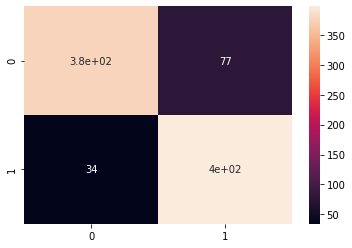

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = ebm.predict(X_test)
clf_rpt = classification_report(y_test,y_pred)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("classification report:", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

Accuracy of logistic regression classifier on test set: 0.70
classification report:               precision    recall  f1-score   support

           0       0.72      0.69      0.70       453
           1       0.69      0.72      0.70       432

    accuracy                           0.70       885
   macro avg       0.70      0.70      0.70       885
weighted avg       0.70      0.70      0.70       885



<AxesSubplot:>

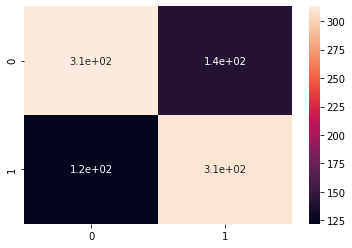

In [20]:
# Refer https://dfrieds.com/machine-learning/visual-introduction-classification-logistic-regression-python.html 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

clf_rpt = classification_report(y_test,y_pred)
print("classification report:", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

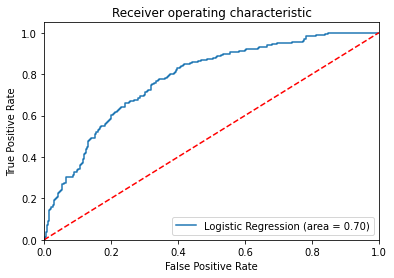

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [22]:
# https://interpret.ml/docs/lr.html
from interpret.glassbox import LogisticRegression
from interpret import show

seed = 1

lr = LogisticRegression(random_state=seed)
lr.fit(X_train, y_train)

lr_global = lr.explain_global()
show(lr_global)

lr_local = lr.explain_local(X_test[:5], y_test[:5])
show(lr_local)

In [23]:
# Example of ClassifierExplainer
#  from sklearn.ensemble import RandomForestClassifier
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# from explainerdashboard.datasets import titanic_survive, titanic_names

# feature_descriptions = {
#     "Sex": "Gender of passenger",
#     "Gender": "Gender of passenger",
#     "Deck": "The deck the passenger had their cabin on",
#     "PassengerClass": "The class of the ticket: 1st, 2nd or 3rd class",
#     "Fare": "The amount of money people paid", 
#     "Embarked": "the port where the passenger boarded the Titanic. Either Southampton, Cherbourg or Queenstown",
#     "Age": "Age of the passenger",
#     "No_of_siblings_plus_spouses_on_board": "The sum of the number of siblings plus the number of spouses on board",
#     "No_of_parents_plus_children_on_board" : "The sum of the number of parents plus the number of children on board",
# }

# X_train, y_train, X_test, y_test = titanic_survive()
# train_names, test_names = titanic_names()
# model = RandomForestClassifier(n_estimators=50, max_depth=5)
# model.fit(X_train, y_train)

# explainer = ClassifierExplainer(model, X_test, y_test, 
#                                 cats=['Deck', 'Embarked',
#                                     {'Gender': ['Sex_male', 'Sex_female', 'Sex_nan']}],
#                                 cats_notencoded={'Embarked': 'Stowaway'}, # defaults to 'NOT_ENCODED'
#                                 descriptions=feature_descriptions, # adds a table and hover labels to dashboard
#                                 labels=['Not survived', 'Survived'], # defaults to ['0', '1', etc]
#                                 idxs = test_names, # defaults to X.index
#                                 index_name = "Passenger", # defaults to X.index.name
#                                 target = "Survival", # defaults to y.name
#                                 )

# db = ExplainerDashboard(explainer, 
#                         title="Titanic Explainer", # defaults to "Model Explainer"
#                         shap_interaction=False, # you can switch off tabs with bools
#                         )
# db.run(port=8050)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1234)

In [25]:
rfc.score(X_test,y_test)

0.9514124293785311

In [26]:
# # Implementation of https://github.com/MarcelRobeer/ContrastiveExplanation -- Issues
# # Contrastive explanation
# import contrastive_explanation as ce

# dm = ce.domain_mappers.DomainMapperTabular(X_train, 
#                                            feature_names=features,
# 					   contrast_names='label')
# exp = ce.ContrastiveExplanation(dm, verbose=True)

# sample = test[0]
# exp.explain_instance_domain(model.predict_proba, sample)

In [27]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

Accuracy = 0.9514124293785311
classification report:               precision    recall  f1-score   support

           0       0.96      0.95      0.95       453
           1       0.95      0.96      0.95       432

    accuracy                           0.95       885
   macro avg       0.95      0.95      0.95       885
weighted avg       0.95      0.95      0.95       885



<AxesSubplot:>

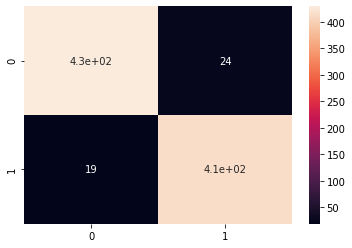

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_test,y_pred)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("classification report:", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [29]:
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard
# explainer = ClassifierExplainer(rfc, X_test, y_test)
#ExplainerDashboard(explainer).run()

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[06:27:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


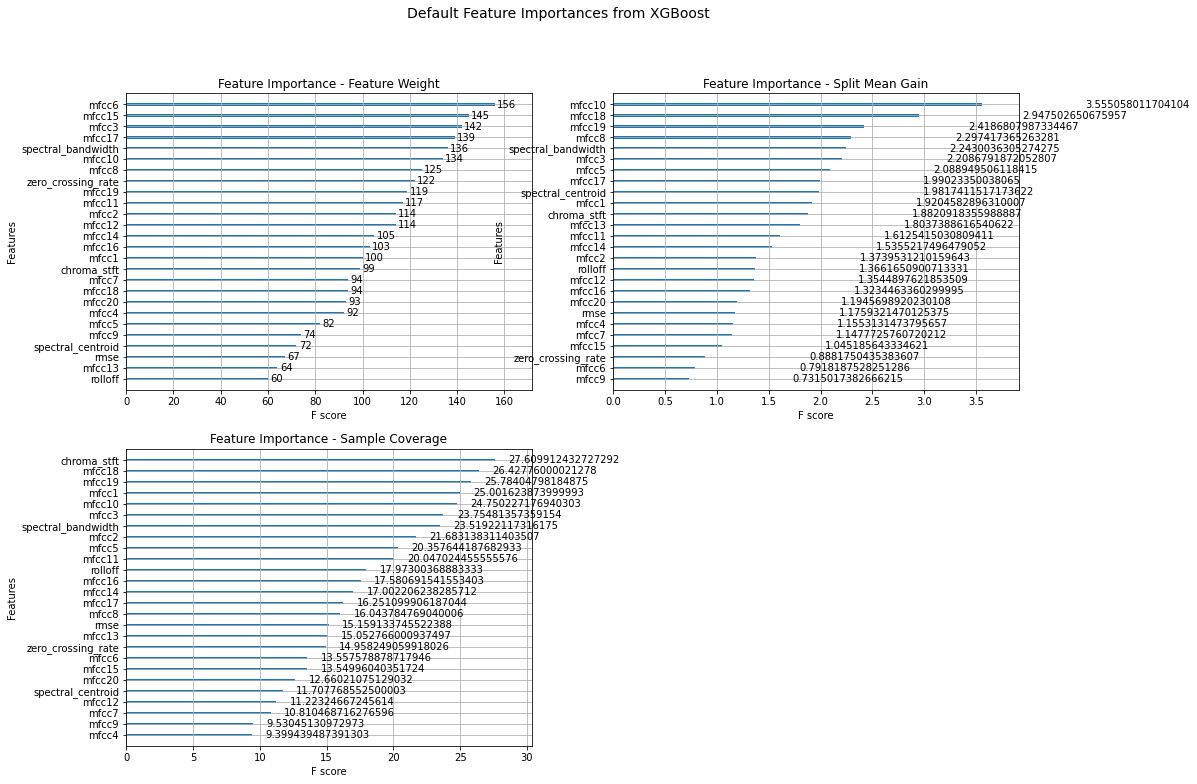

In [30]:
# # https://github.com/DemystifAI/explainableAI/blob/master/Income_XAI.ipynb
# XGBOOST Feature Importance
import xgboost as xgb
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

In [31]:
# Since XGBoost has some issues with feature name ordering when building models with dataframes,
# we will build our same model with numpy arrays to make LIME work. Remember the model being built
# is the same ensemble model which we treat as our black box machine learning model
import xgboost as xgb
xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train)

[06:27:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
headers = X_train.columns

In [33]:
# ------------------------------------------------ #

# LIME Implementation

# ------------------------------------------------ #

*LimeTabularExplainer* class helps in explaining predictions on tabular (i.e. matrix) data. For numerical features, it perturbs them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and stds in the training data. For categorical features, it perturbs by sampling according to the training distribution, and making a binary feature that is 1 when the value is the same as the instance being explained.

*explain_instance()* function generates explanations for a prediction. First, we generate neighborhood data by randomly perturbing features from the instance. We then learn locally weighted linear (surrogate) models on this neighborhood data to explain each of the classes in an interpretable way.

In [34]:
explainer = LimeTabularExplainer(X_train.values, feature_names= headers, discretize_continuous=True, 
                                 class_names=['Healthy', 'COVID +ve'],verbose=True)

Healthy Sample

In [35]:
# Explain instance i=0
exp1 = explainer.explain_instance(X_test.iloc[0].values, xgc_np.predict_proba, distance_metric='euclidean')

Intercept 0.0922899151888659
Prediction_local [0.26009096]
Right: 0.5026549


In [36]:
y_test.iloc[0]

0

In [37]:
exp1.show_in_notebook(show_table=True)

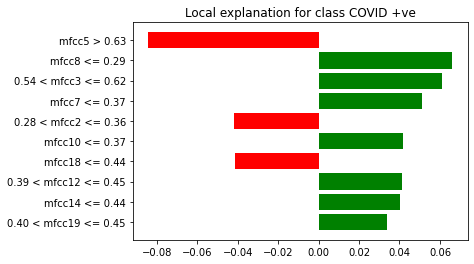

In [38]:
fig1 = exp1.as_pyplot_figure()

In [39]:
exp1.as_list()

[('mfcc5 > 0.63', -0.08428220316159697),
 ('mfcc8 <= 0.29', 0.06615218824445626),
 ('0.54 < mfcc3 <= 0.62', 0.06115248200690026),
 ('mfcc7 <= 0.37', 0.05119981134413077),
 ('0.28 < mfcc2 <= 0.36', -0.04187741329103729),
 ('mfcc10 <= 0.37', 0.04181602424967288),
 ('mfcc18 <= 0.44', -0.041312182882013576),
 ('0.39 < mfcc12 <= 0.45', 0.04103627858544874),
 ('mfcc14 <= 0.44', 0.040007736955577806),
 ('0.40 < mfcc19 <= 0.45', 0.03390831966412421)]

COVID +ve Sample

In [40]:
# Explain instance i=1
exp2 = explainer.explain_instance(X_test.iloc[1].values, xgc_np.predict_proba, distance_metric='euclidean')

Intercept 0.0729369247080385
Prediction_local [0.30191741]
Right: 0.9992982


In [41]:
y_test.iloc[1]

1

In [42]:
exp2.show_in_notebook(show_table=True)

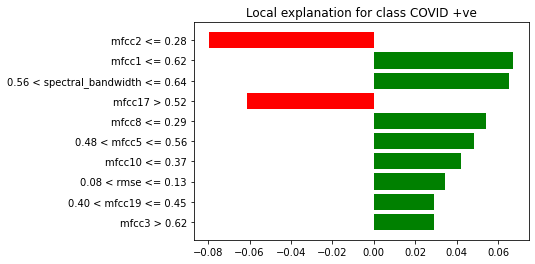

In [43]:
fig2 = exp2.as_pyplot_figure()

In [44]:
exp2.as_list()

[('mfcc2 <= 0.28', -0.07958401182057498),
 ('mfcc1 <= 0.62', 0.0673856691945696),
 ('0.56 < spectral_bandwidth <= 0.64', 0.06526258087091359),
 ('mfcc17 > 0.52', -0.06136125004753767),
 ('mfcc8 <= 0.29', 0.054242079991942596),
 ('0.48 < mfcc5 <= 0.56', 0.048190509509986275),
 ('mfcc10 <= 0.37', 0.04227141878010036),
 ('0.08 < rmse <= 0.13', 0.03458765936806063),
 ('0.40 < mfcc19 <= 0.45', 0.029121862289867056),
 ('mfcc3 > 0.62', 0.028863970537329618)]

### SHAP Implementation


SHAP is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations.

In [45]:
explainerS = shap.TreeExplainer(xgc)

shap_values = explainerS.shap_values(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [46]:
print('Expected Value:', explainerS.expected_value)

Expected Value: -0.10404699


In [47]:
pd.DataFrame(shap_values).head()

0         1         2         3         4         5         6   \
0  0.436841  0.101591 -0.124729  1.175718  0.432162 -0.461583  0.611178   
1 -0.286252  0.418624  0.448742  1.095380  0.006437  0.067975  1.266046   
2  0.118303  0.242497  0.280600  0.050535 -0.082243 -0.153148 -0.092202   
3 -0.427591  0.274094  0.421280  0.739436 -0.440690 -0.676592  0.179995   
4 -0.451013  0.147186 -0.461676 -1.559915 -0.031736 -0.534536 -0.126592   

         7         8         9   ...        16        17        18        19  \
0 -1.125885  0.926089  0.162308  ... -0.183194  0.675901 -0.209525  0.381635   
1 -0.594867  1.755417 -0.443092  ...  0.219595 -0.217102 -0.134896  0.622499   
2 -0.214219  1.032733 -0.124670  ...  0.285059  0.954268 -0.193957  0.464939   
3 -0.046925 -1.593423  0.103951  ... -2.176764  0.172331  0.088553  0.054053   
4 -0.825981  0.734339 -0.239549  ...  0.059081 -1.086297 -0.082978  0.286181   

         20        21        22        23        24        25  
0 -0.339747 -1.390187  0.008089 -0.643665  0.124315  0.183825  
1 -0.102572  0.709126 -1.279451  0.655881  0.763277  0.017929  
2  0.672989 -0.075326  0.286189  0.158868 -0.252853  0.332221  
3  0.482435 -0.821164  0.039029 -0.664472 -0.079836  0.437398  
4 -0.493719 -1.055211  0.195678 -0.967452  0.293145  0.255717  

[5 rows x 26 columns]

In [48]:
shap.initjs()

In [49]:
shap.force_plot(explainerS.expected_value, shap_values[2,:], X_test.iloc[1,:])

In [50]:
shap.force_plot(explainerS.expected_value, shap_values[12,:], X_test.iloc[0,:])

In [51]:
shap.force_plot(explainerS.expected_value, shap_values[:30,:], X_test.iloc[:30,:])

In [52]:
# from aix360.algorithms.shap import KernelExplainer, TreeExplainer
# ip_shap = KernelExplainer(best_estimator(ip_trained).predict_proba, shap.kmeans(test_X, 300)) #kmeans clusters 32980 points into 100 for prototypes
# print(type(ip_shap))

# ip_shap_values  = ip_shap.explain_instance(test_X.iloc[0,:])

In [53]:
#shap.waterfall_plot(ip_shap.explainer.expected_value[0], ip_shap_values[0], test_X.iloc[0, :])

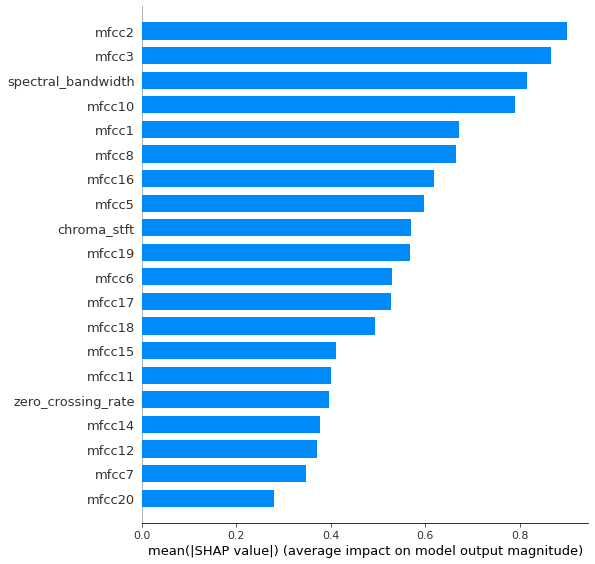

In [54]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

**SHAP Summary Plot**

Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don't fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

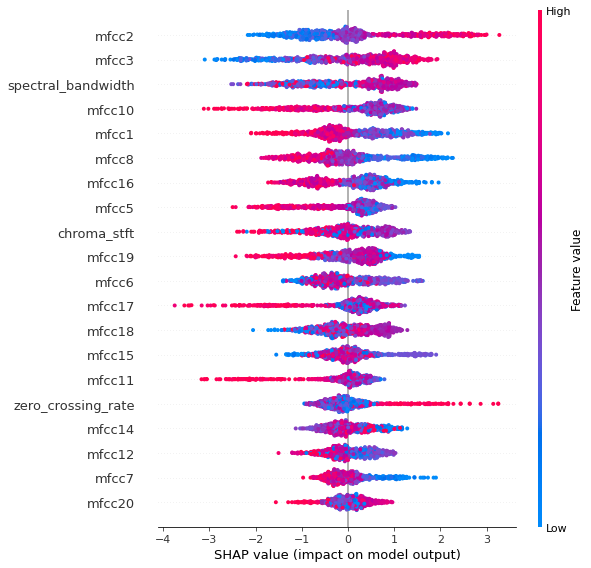

In [55]:
shap.summary_plot(shap_values, X_test)

In [56]:
shap_values.size

23010

**SHAP Dependence Plots:**

**Also see Double dependence plots**

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

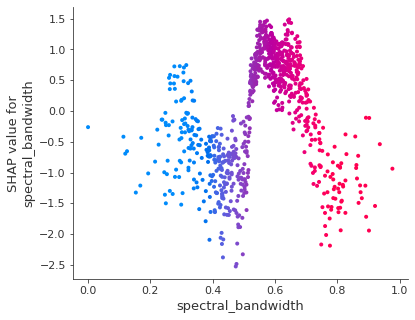

In [57]:
shap.dependence_plot(ind='spectral_bandwidth', interaction_index='spectral_bandwidth',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_train)

In [58]:
# Visualizing the tree 
# https://github.com/DemystifAI/explainableAI/blob/master/fifa_player.ipynb

In [59]:
# Explore https://explainerdashboard.readthedocs.io/en/latest/

In [60]:
# eli5 Library 

In [61]:
import eli5
# create our dataframe of feature importances
feat_imp_df = eli5.explain_weights_df(rfc, feature_names=features)
feat_imp_df

feature    weight       std
0               mfcc10  0.077684  0.039639
1               mfcc19  0.063184  0.030939
2               mfcc17  0.062337  0.028542
3   spectral_bandwidth  0.056839  0.031855
4                mfcc8  0.048097  0.024640
5                mfcc3  0.047496  0.020840
6               mfcc12  0.045152  0.024203
7               mfcc18  0.045082  0.020580
8                mfcc5  0.039308  0.022601
9          chroma_stft  0.036116  0.017439
10              mfcc14  0.035701  0.022221
11               mfcc1  0.035028  0.017794
12              mfcc11  0.034839  0.015640
13             rolloff  0.034204  0.020844
14               mfcc2  0.033460  0.016164
15   spectral_centroid  0.032177  0.019623
16              mfcc20  0.030408  0.014253
17              mfcc16  0.029809  0.018566
18  zero_crossing_rate  0.029584  0.017154
19               mfcc6  0.027989  0.017104
20               mfcc7  0.027834  0.015407
21              mfcc15  0.027509  0.015196
22              mfcc13  0.026941  0.015791
23                rmse  0.024698  0.014466
24               mfcc4  0.024588  0.014787
25               mfcc9  0.023934  0.014515

In [62]:
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     rfc],
                               columns=features)

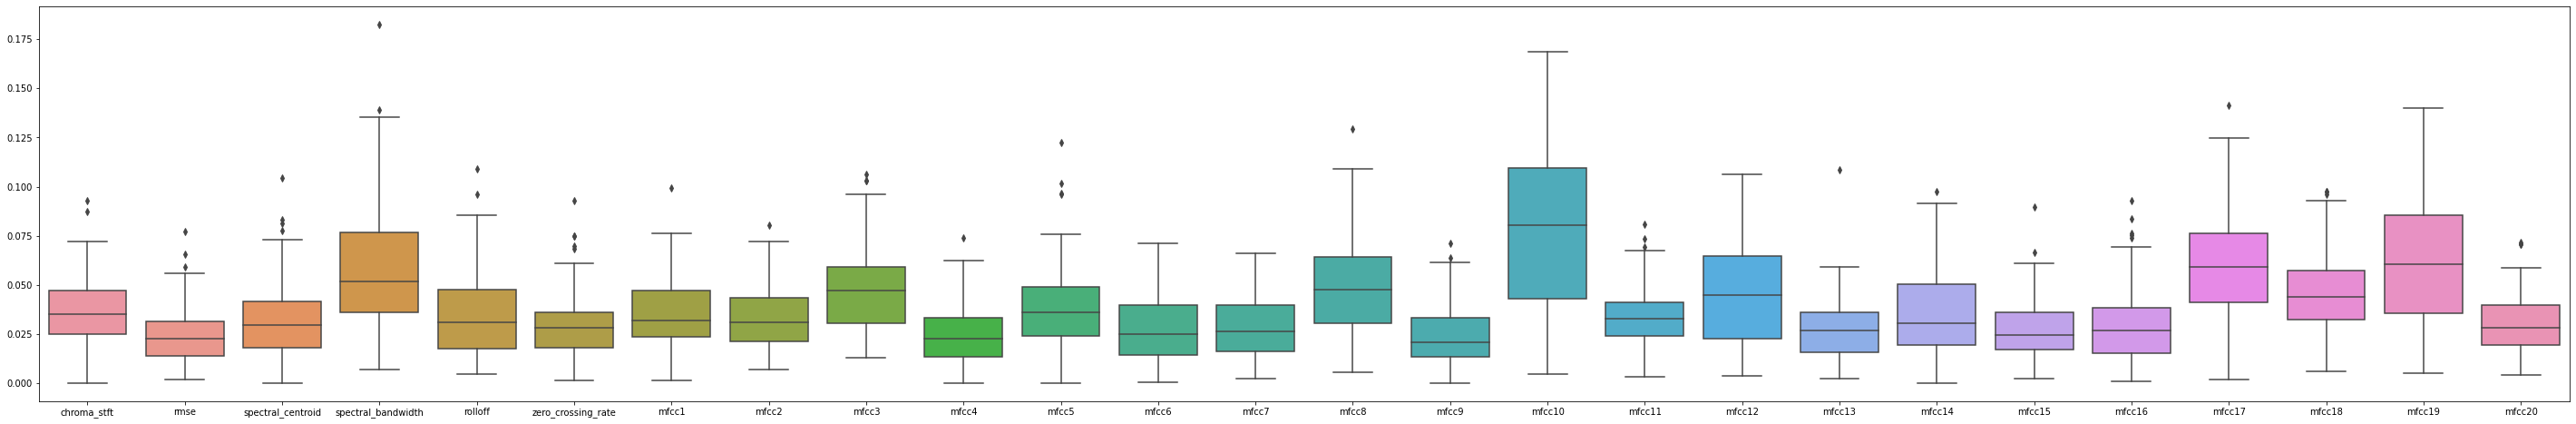

In [63]:
plt.figure(figsize=(50, 8))
sns.boxplot(data = all_feat_imp_df)
plt.savefig('eli5_feature_importance.png')

In [64]:
# # Model: rfc
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import graphviz
# import pydotplus
# from io import StringIO  

# # Get all trees of depth 7 in the random forest
# depths7 = [tree for tree in rfc.estimators_ if tree.tree_.max_depth==7]
# # grab the first one
# tree = depths7[0]
# # plot the tree
# dot_data = StringIO()
# export_graphviz(tree, out_file=dot_data, feature_names=features, 
#                 filled=True, rounded=True, special_characters=True, class_names=['COVID +ve', 'Healthy'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# graph.write_png('rfc_tree.png') 
# Image(graph.create_png())

In [65]:
# # Model: xgb
# from sklearn.ensemble import GradientBoostingClassifier
# gbr_1 = GradientBoostingClassifier(random_state = 2589)
# gbr_1.fit(X_train,y_train)

# from sklearn_gbmi import *
# d=h_all_pairs(gbr_1,X_train)# d is a dictionary of feature pairs and their respective interaction strength
# l=sorted(d.items(), key=lambda x: x[1])#converted to a list sorted by interaction values

# l=l[-20:] # let's just take the top 10
# data=pd.DataFrame(l)
# data.columns=['Feature',"Interaction"]
# data.index=data['Feature']
# data=data.drop(labels=['Feature'],axis=1)

In [66]:
# data.plot(kind='barh', color='teal', title="Feature Interaction Strength")

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[289 164]
 [ 85 347]]


0.7186440677966102

In [68]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [69]:
class_names2pass = sorted(y_test.unique())
print(class_names2pass)
#class_names=['COVID +ve', 'Healthy']

[0, 1]


In [70]:
# # Decision Tree, clf
# from sklearn.tree import export_graphviz
# from io import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = features,class_names=['COVID +ve', 'Healthy'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('dtree_tree.png')
# Image(graph.create_png())

In [71]:
# 09-06

In [72]:
pip install dtreeviz

     |████████████████████████████████| 60 kB 2.7 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=d879c051076bd16a504e8d7dca54954ce938bb84293d7f337492248451bf928a
  Stored in directory: /root/.cache/pip/wheels/9f/a6/a1/898c991294471015f13c1e5b456fb8134c1af835db4dd93a7a
Successfully built dtreeviz
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
autogluon-core 0.1.0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [73]:
# # https://github.com/parrt/dtreeviz 
# from dtreeviz.trees import *

# viz = dtreeviz(clf,
#                X_train,
#                y_train.values,
#                target_name='label',
#                feature_names=features,
#                class_names=['COVID +ve', 'Healthy'],
#                histtype='bar', 
#                orientation='LD',
#                scale=2)
              
# viz

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[06:28:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


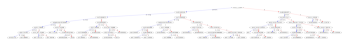

In [74]:
# plot decision tree
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot single tree
plot_tree(model)
plt.show()

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[06:28:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
-----------------------------------------------------------------------------------------
classification report:               precision    recall  f1-score   support

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



<AxesSubplot:>

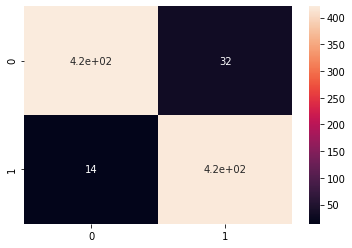

In [75]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
print(model_XGB)
expected_y  = y_test
predicted_y = model_XGB.predict(X_test)
print("-----------------------------------------------------------------------------------------")
clf_rpt = classification_report(expected_y,predicted_y)
print("classification report:", clf_rpt)
cm = confusion_matrix(expected_y, predicted_y)
sns.heatmap(cm,annot=True)

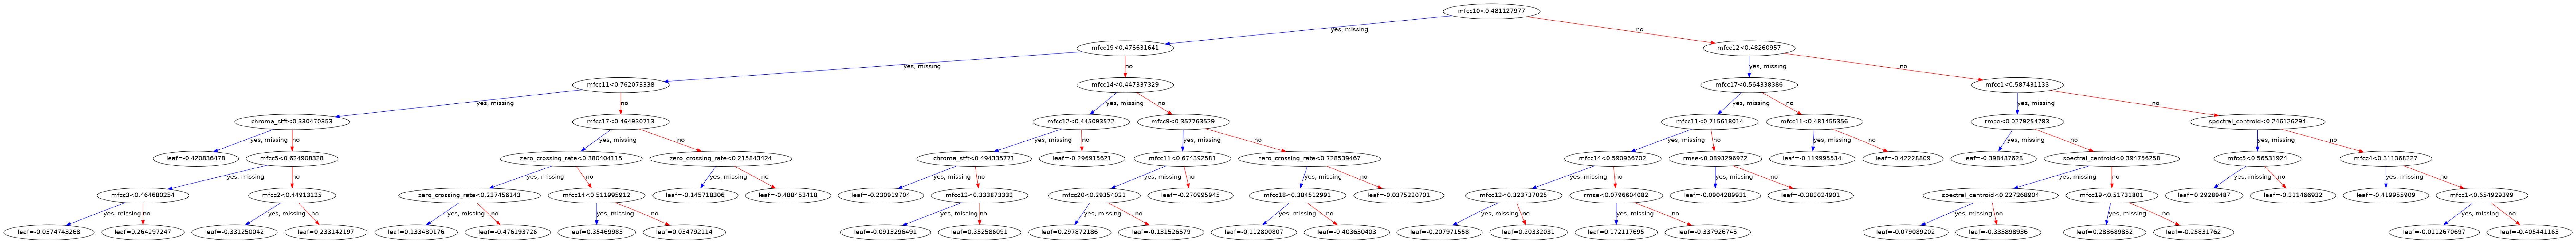

In [76]:
# plot_tree(model_XGB, num_trees=0, rankdir='LR'); plt.show()

# # plot tree
# plt.figure(figsize=(12,12))
# plot_tree(model_XGB, fontsize=6)
# plt.savefig('XGB_viz', dpi=100)

xgb.plot_tree(model_XGB, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.savefig('XGB_viz', dpi=100)

In [77]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn import datasets, neighbors
# from mlxtend.plotting import plot_decision_regions

# def knn_comparison(data, k):
#  x = X_train.values
#  y = y_train.astype(int).values
#  clf = neighbors.KNeighborsClassifier(n_neighbors=k)
#  clf.fit(x, y)
# # Plotting decision region
#  plot_decision_regions(x, y, clf=clf, legend=10)
# # Adding axes annotations
#  plt.xlabel('X')
#  plt.ylabel('Y')
#  plt.title("Knn with K="+ str(k))
#  plt.show()

# Ensemble Model

In [78]:
# import sklearn.base as skb
# # Issue in class
# class MixModel(skb.BaseEstimator,skb.RegressorMixin,skb.TransformerMixin):
#     def __init__(self,algs):
#         self.algs = algs
#     def fit(self,X,y):
#         self.algs_ = [skb.clone(x) for x in self.algs]
#         for alg in self.algs_:
#             alg.fit(X,y)
#         return self
#     def predict(self,X):
#         predictions = np.column_stack([
#             stacked_model.predict(X) for stacked_model in self.algs_
#         ])
#         return np.mean(predictions,axis=1)

In [79]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rfc', RandomForestClassifier(random_state=1234)))
	level0.append(('logreg', LogisticRegression()))
	level0.append(('XG Boost', XGBClassifier()))
	level0.append(('ebm', ExplainableBoostingClassifier(random_state=seed)))
	level0.append(('clf',DecisionTreeClassifier(criterion="entropy", max_depth=5)))
	level1 = RandomForestClassifier(random_state=1234)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

rfc: 0.977736, -0.022264, 0.008855
[-0.02238806 -0.01865672 -0.02238806 -0.01492537 -0.00746269 -0.0261194
 -0.03731343 -0.01492537 -0.0261194  -0.0261194  -0.03358209 -0.01492537
 -0.01865672 -0.04104478 -0.02238806 -0.02985075 -0.01865672 -0.02985075
 -0.03358209 -0.01865672 -0.01119403 -0.03358209 -0.02985075 -0.01119403
 -0.0261194  -0.01865672 -0.0261194  -0.00373134 -0.01492537 -0.01492537]
[0.97761194 0.98134328 0.97761194 0.98507463 0.99253731 0.9738806
 0.96268657 0.98507463 0.9738806  0.9738806  0.96641791 0.98507463
 0.98134328 0.95895522 0.97761194 0.97014925 0.98134328 0.97014925
 0.96641791 0.98134328 0.98880597 0.96641791 0.97014925 0.98880597
 0.9738806  0.98134328 0.9738806  0.99626866 0.98507463 0.98507463]
-----------------------------------------
logreg: 0.716294, -0.283706, 0.026742
[-0.29477612 -0.29104478 -0.2761194  -0.25746269 -0.25373134 -0.28358209
 -0.23880597 -0.3358209  -0.32835821 -0.27985075 -0.25       -0.30223881
 -0.28731343 -0.26119403 -0.26865672 -0

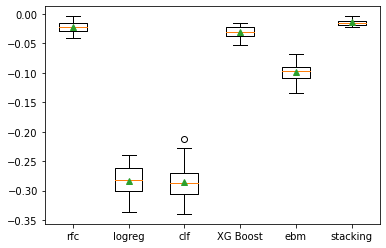

In [80]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['rfc'] = RandomForestClassifier(random_state=1234)
	models['logreg'] =  LogisticRegression()
	models['clf'] = DecisionTreeClassifier(criterion="entropy", max_depth=5)
	models['XG Boost'] = XGBClassifier()
	models['ebm'] = ExplainableBoostingClassifier(random_state=seed)
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_model1(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores1 = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores1

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, Y)
	scores1 = evaluate_model1(model, X, Y)
	results.append(scores)
	names.append(name)
	print('%s: %f, %f, %f' % (name, mean(scores1), mean(scores), std(scores)))
	print(scores)
	print(scores1)
	print("-----------------------------------------")
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [81]:
# from mlxtend.classifier import StackingCVClassifier
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
# sclf = StackingCVClassifier(classifiers=[ebm, logreg, rfc, clf, model_XGB], 
#                           meta_classifier=logreg)

# print('10-fold cross validation:\n')

# for clf, label in zip([ebm, rfc, model_XGB, clf, logreg], 
#                       ['ExplainableBoostingClassifier',
#                        'RandomForestClassifier', 
#                         'XG Boost','DecisionTreeClassifier',
#                        'MetaClassifier']):

#     sclf_scores = model_selection.cross_val_score(clf, X, Y,
#                                               cv=10, scoring='accuracy')
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (sclf_scores.mean(), sclf_scores.std(), label))

In [82]:
# ## Using mixed model of random forest, gradient boosting and XGB Regressor
# mixed_model = MixModel(algs = [ebm, logreg, rfc, clf, model_XGB])
# mixed_model.fit(X_train, y_train)
# y_train_pred = mixed_model.predict(X_train)
# y_test_pred = mixed_model.predict(X_test)
# print(r2_score(y_train,y_train_pred))
# print(r2_score(y_test,y_test_pred))

In [83]:
# # make a prediction with a stacking ensemble
# # define the base models
# level0 = list()
# level0.append(('dtree', dtree))
# level0.append(('rfr', RandomForestRegressor(n_estimators = 50,random_state=40,
#                           min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001,min_samples_split=5)))
# level0.append(('xgboost', XGBRegressor(learning_rate=0.01,n_estimators=3460,
#                                      max_depth=3, min_child_weight=0,
#                                      gamma=0, subsample=0.7,
#                                      colsample_bytree=0.7,
#                                      objective='reg:linear', nthread=-1,
#                                      scale_pos_weight=1, seed=27,
#                                      reg_alpha=0.00006)))
# level0.append(('gbr', GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)))
# # define meta learner model
# level1 = LinearRegression()
# # define the stacking ensemble
# model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# # fit the model on all available data
# model.fit(X, y)

# # # make a prediction for one example
# # data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
# # yhat = model.predict(data)
# # print('Predicted Value: %.3f' % (yhat))

In [84]:
# make a prediction with a stacking ensemble
# define the base models
level0 = list()
level0.append(('rfc', RandomForestClassifier(random_state=1234)))
level0.append(('logreg', LogisticRegression()))
level0.append(('XG Boost', XGBClassifier()))
level0.append(('ebm', ExplainableBoostingClassifier(random_state=seed)))
level0.append(('clf',DecisionTreeClassifier(criterion="entropy", max_depth=5)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:09:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:09:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:09:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:09:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:09:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:09:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(random_state=1234)),
                               ('logreg', LogisticRegression()),
                               ('XG Boost',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None, gamma=None,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=No...
                                              n_estimators=100, n_jobs=None,
                                       

In [85]:
model.score(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



0.9638418079096045

In [86]:
predictions = model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [87]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9638418079096045
[[438  15]
 [ 17 415]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       453
           1       0.97      0.96      0.96       432

    accuracy                           0.96       885
   macro avg       0.96      0.96      0.96       885
weighted avg       0.96      0.96      0.96       885



In [88]:
y_pred = predictions

In [89]:
# Importing the metrics package from sklearn library
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted COVID+ve', 'Predicted Healthy'],
            index = ['Actual COVID+ve', 'Actual Healthy'])
# Showing the confusion matrix
cm_df

Predicted COVID+ve  Predicted Healthy
Actual COVID+ve                 438                 15
Actual Healthy                   17                415

Accuracy = 0.9638418079096045
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       453
           1       0.97      0.96      0.96       432

    accuracy                           0.96       885
   macro avg       0.96      0.96      0.96       885
weighted avg       0.96      0.96      0.96       885



<AxesSubplot:>

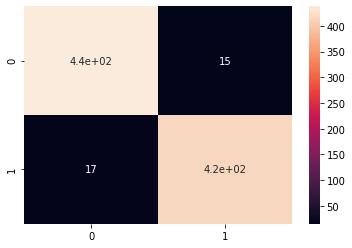

In [90]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_test,y_pred)
print("Accuracy =", accuracy_score(y_test, y_pred))
print(clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [91]:
TN, FP, FN, TP = cm.ravel()

In [92]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [93]:
confusion_metrics(cm)

True Positives: 415
True Negatives: 438
False Positives: 15
False Negatives: 17
--------------------------------------------------
Accuracy: 0.96
Mis-Classification: 0.04
Sensitivity: 0.96
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.96


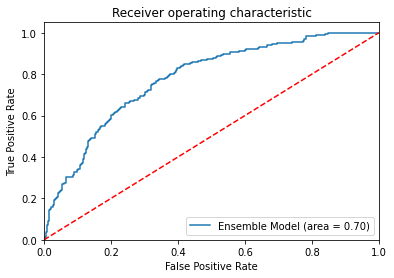

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ensemble_roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Ensemble Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()